<a href="https://colab.research.google.com/github/Moutaz-Code/CancerModelColab/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
from google.colab import drive

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import kagglehub
import os


# Read the Dataset and store it in DATA

In [3]:
path_to_directory = kagglehub.dataset_download("zahidmughal2343/global-cancer-patients-2015-2024")

file_path = os.path.join(path_to_directory, 'global_cancer_patients_2015_2024.csv')

originalDATA = pd.read_csv(file_path)
modifiedDATA = originalDATA #this is what we will edit and change

# Explore the Dataset

In [4]:
originalDATA

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [5]:
# No null values
modifiedDATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [6]:
# mean vary significanlty between each attribute ==> Normalization is NEEDED!!!
# std not very high. Suggesting the distribution is good in each attribute
modifiedDATA.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [7]:
# DATA DataFrame does not contain any duplicate rows
modifiedDATA.duplicated().sum()

np.int64(0)

# ***ENCODING***


---

*   **Gender** ==> label encoding (0, 1)
*   **Years** ==> Ordinal Encoding (not necessary as it is integer)
*   **Country_Region** ==> label encoding (0, 1, 2, .....)
*   **Cancer_type** ==> one-hot encoding
*   **Cancer_stage** ==> ordinal encoding
⚗


In [8]:
# Gender ==> label encoding (0, 1) (Female, Male)

le = LabelEncoder()
modifiedDATA['Gender'] = le.fit_transform(modifiedDATA['Gender'])

In [9]:
# Cancer_Type ==> one-hot encoding

ohe = OneHotEncoder(handle_unknown='ignore')
cancer_type_encoded = ohe.fit_transform(modifiedDATA[['Cancer_Type']]).toarray()
cancer_type_df = pd.DataFrame(cancer_type_encoded, columns=ohe.get_feature_names_out(['Cancer_Type']))
modifiedDATA = pd.concat([modifiedDATA.drop('Cancer_Type', axis=1), cancer_type_df], axis=1)

In [10]:
#Country_Region ==> label encoding (0, 1, 2, .....)

le = LabelEncoder()
modifiedDATA['Country_Region'] = le.fit_transform(modifiedDATA['Country_Region'])

In [11]:
# Cancer_Stage ==> ordinal encoding ⚗

ord = OrdinalEncoder()
modifiedDATA['Cancer_Stage'] = ord.fit_transform(modifiedDATA[['Cancer_Stage']])

In [12]:
modifiedDATA

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,...,Survival_Years,Target_Severity_Score,Cancer_Type_Breast,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,PT0000000,71,1,8,2021,6.4,2.8,9.5,0.9,8.7,...,5.9,4.92,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,PT0000001,34,1,3,2021,1.3,4.5,3.7,3.9,6.3,...,4.7,4.65,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,PT0000002,80,1,6,2023,7.4,7.9,2.4,4.7,0.1,...,7.1,5.84,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PT0000003,40,1,8,2015,1.7,2.9,4.8,3.5,2.7,...,1.6,3.12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,PT0000004,43,0,1,2017,5.1,2.8,2.3,6.7,0.5,...,2.9,3.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,1,6,2023,2.3,7.5,2.8,3.8,2.9,...,1.0,3.63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49996,PT0049996,40,0,9,2018,6.4,3.5,2.9,9.0,9.8,...,0.4,6.03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49997,PT0049997,74,1,6,2015,6.2,1.6,8.7,4.7,4.0,...,2.7,6.02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,PT0049998,21,1,1,2018,4.0,6.5,7.6,8.6,8.1,...,7.5,6.54,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# ***FEATURE SELECTION***
---


*   Drop Patient ID
*   Investigate what other attributes to be dropped using some techniques, e.g, information gain



In [13]:
# prompt: from DATA datafrom, drop the Patient_ID

modifiedDATA = modifiedDATA.drop('Patient_ID', axis=1)

In [14]:
modifiedDATA

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Stage,...,Survival_Years,Target_Severity_Score,Cancer_Type_Breast,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,71,1,8,2021,6.4,2.8,9.5,0.9,8.7,3.0,...,5.9,4.92,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,34,1,3,2021,1.3,4.5,3.7,3.9,6.3,0.0,...,4.7,4.65,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,80,1,6,2023,7.4,7.9,2.4,4.7,0.1,2.0,...,7.1,5.84,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40,1,8,2015,1.7,2.9,4.8,3.5,2.7,1.0,...,1.6,3.12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,43,0,1,2017,5.1,2.8,2.3,6.7,0.5,3.0,...,2.9,3.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,80,1,6,2023,2.3,7.5,2.8,3.8,2.9,0.0,...,1.0,3.63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49996,40,0,9,2018,6.4,3.5,2.9,9.0,9.8,1.0,...,0.4,6.03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49997,74,1,6,2015,6.2,1.6,8.7,4.7,4.0,0.0,...,2.7,6.02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,21,1,1,2018,4.0,6.5,7.6,8.6,8.1,4.0,...,7.5,6.54,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Correlation with Severity_Score:
Target_Severity_Score    1.000000
Smoking                  0.484420
Genetic_Risk             0.478700
Air_Pollution            0.366963
Alcohol_Use              0.363250
Obesity_Level            0.251366
Cancer_Type_Skin         0.005897
Country_Region           0.005800
Cancer_Type_Leukemia     0.005283
Survival_Years           0.004161
Cancer_Type_Liver        0.004150
Year                     0.002109
Cancer_Type_Cervical     0.000080
Cancer_Stage            -0.000722
Cancer_Type_Breast      -0.001079
Age                     -0.001481
Cancer_Type_Prostate    -0.002486
Cancer_Type_Lung        -0.004250
Gender                  -0.004613
Cancer_Type_Colon       -0.007549
Treatment_Cost_USD      -0.466058
Name: Target_Severity_Score, dtype: float64


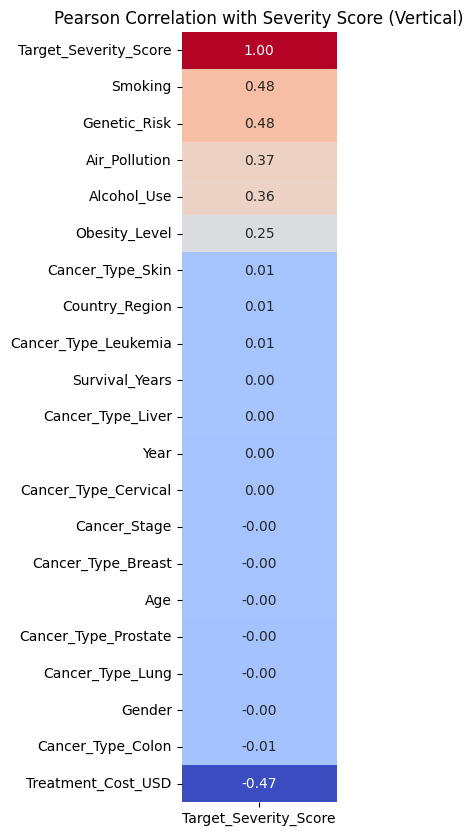

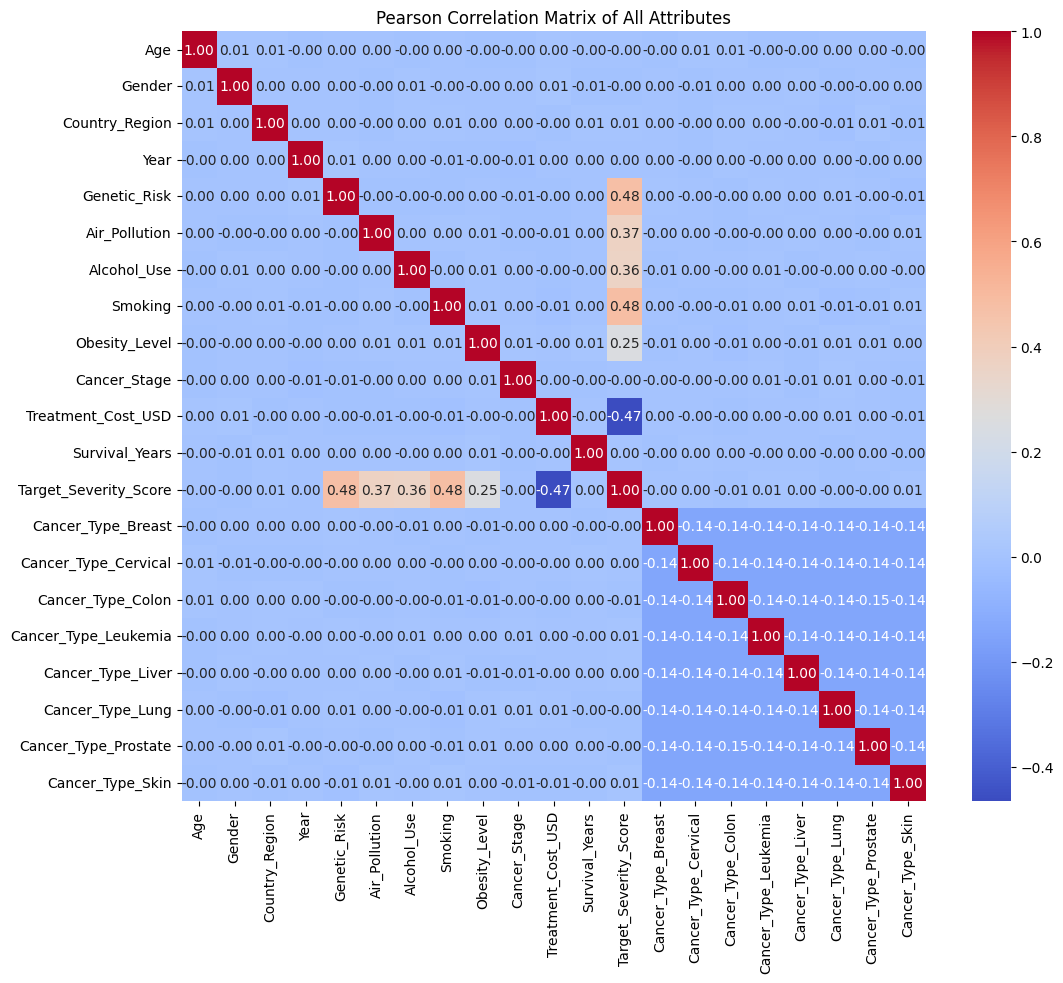

In [15]:
# prompt: # prompt: I want a 1 dimensional array print and 1d pearson's heatmap (vertical) for attributes against target severity score, and a 2d heatmap with all attributes against each other

# Calculate the correlation matrix
correlation_matrix = modifiedDATA.corr()

# Get the correlation of all attributes with the target variable ('Severity_Score')
correlation_with_target = modifiedDATA.corr()['Target_Severity_Score'].sort_values(ascending=False)

# Print the 1D array of correlations with Severity_Score
print("Correlation with Severity_Score:")
print(correlation_with_target)

# Create a 1D vertical heatmap for correlations with Severity_Score
plt.figure(figsize=(2, 10)) # Adjust figure size for a vertical heatmap
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Pearson Correlation with Severity Score (Vertical)')
plt.yticks(rotation=0) # Keep y-axis labels horizontal
plt.show()

# Create a 2D heatmap of all attributes against each other
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of All Attributes')
plt.show()


In [16]:
# prompt: I want other feature selection methods, other than pearson's correlation

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Assuming 'Target_Severity_Score' is the target variable
X = modifiedDATA.drop('Target_Severity_Score', axis=1)
y = modifiedDATA['Target_Severity_Score']

# --- Using ANOVA F-value ---
# Select features based on the ANOVA F-value between each feature and the target
# Use f_classif for classification tasks. If 'Target_Severity_Score' was continuous,
# you would use f_regression. Given the task description, it seems more likely to be a regression task,
# but since the previous code used 'Severity_Score', which often implies classification or a scoring system,
# and f_classif is suitable for discrete targets, let's assume it's a classification-like problem for demonstration.
# If 'Target_Severity_Score' is truly continuous, replace f_classif with f_regression.

# Install if not already installed
!pip install scipy
!pip install scikit-learn

from sklearn.feature_selection import f_regression # Import f_regression

# Check the data type of the target variable to decide between f_classif and f_regression
if pd.api.types.is_numeric_dtype(y):
    # Treat as regression if numeric
    k_best_anova = SelectKBest(score_func=f_regression, k='all')
else:
    # Treat as classification if not numeric (e.g., discrete categories)
     k_best_anova = SelectKBest(score_func=f_classif, k='all')


k_best_anova.fit(X, y)

# Get scores and p-values
anova_scores = pd.DataFrame({'Feature': X.columns, 'ANOVA_Score': k_best_anova.scores_})

# Handle potential NaNs in p-values if using f_classif with certain data
# If using f_regression, pvalues might be more reliably calculated.
# If using f_classif, check if k_best_anova.pvalues_ exists and handle NaNs if needed.
# For simplicity here, we'll primarily focus on the scores.

# Sort by score
anova_scores = anova_scores.sort_values(by='ANOVA_Score', ascending=False)

print("\nFeatures ranked by ANOVA F-value:")
print(anova_scores)

# --- Using Mutual Information ---
# Select features based on mutual information between each feature and the target
# Suitable for both numerical and categorical features, and can capture non-linear relationships.
# Note: mutual_info_classif is for discrete targets, mutual_info_regression is for continuous targets.
# Again, checking the target type to choose the appropriate function.

# Install if not already installed
!pip install scikit-learn

from sklearn.feature_selection import mutual_info_regression # Import mutual_info_regression

if pd.api.types.is_numeric_dtype(y):
    # Treat as regression if numeric
    selector_mi = SelectKBest(score_func=mutual_info_regression, k='all')
else:
    # Treat as classification if not numeric
    selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')

selector_mi.fit(X, y)

# Get scores
mi_scores = pd.DataFrame({'Feature': X.columns, 'Mutual_Information_Score': selector_mi.scores_})

# Sort by score
mi_scores = mi_scores.sort_values(by='Mutual_Information_Score', ascending=False)

print("\nFeatures ranked by Mutual Information:")
print(mi_scores)

# You can use these rankings to select the top K features based on ANOVA or Mutual Information scores.
# For example, to get the top 5 features based on Mutual Information:
top_5_mi_features = mi_scores['Feature'].head(5).tolist()
print(f"\nTop 5 features based on Mutual Information: {top_5_mi_features}")


Features ranked by ANOVA F-value:
                 Feature   ANOVA_Score
7                Smoking  15330.047784
4           Genetic_Risk  14863.208319
10    Treatment_Cost_USD  13873.538424
5          Air_Pollution   7780.558933
6            Alcohol_Use   7600.097218
8          Obesity_Level   3372.191431
14     Cancer_Type_Colon      2.849055
19      Cancer_Type_Skin      1.738632
2         Country_Region      1.682042
15  Cancer_Type_Leukemia      1.395689
1                 Gender      1.063748
17      Cancer_Type_Lung      0.903227
11        Survival_Years      0.865733
16     Cancer_Type_Liver      0.860992
18  Cancer_Type_Prostate      0.309057
3                   Year      0.222348
0                    Age      0.109713
12    Cancer_Type_Breast      0.058197
9           Cancer_Stage      0.026034
13  Cancer_Type_Cervical      0.000317

Features ranked by Mutual Information:
                 Feature  Mutual_Information_Score
7                Smoking                  0.134665
4   

# ***DROP IRRELEVANT***
---

In [17]:
# prompt: keep the, Obesity_Level, Alcohol_Use, Treatment_Cost_USD, Genetic_Risk, Smoking in new Data Frame, vaiable called something feature selection

feature_selection_df = modifiedDATA[['Obesity_Level', 'Alcohol_Use', 'Treatment_Cost_USD', 'Genetic_Risk', 'Smoking', 'Target_Severity_Score']]
feature_selection_df


,Obesity_Level,Alcohol_Use,Treatment_Cost_USD,Genetic_Risk,Smoking,Target_Severity_Score
0,8.7,9.5,62913.44,6.4,0.9,4.92
1,6.3,3.7,12573.41,1.3,3.9,4.65
2,0.1,2.4,6984.33,7.4,4.7,5.84
3,2.7,4.8,67446.25,1.7,3.5,3.12
4,0.5,2.3,77977.12,5.1,6.7,3.62
...,...,...,...,...,...,...
49995,2.9,2.8,71463.70,2.3,3.8,3.63
49996,9.8,2.9,49619.66,6.4,9.0,6.03
49997,4.0,8.7,5338.25,6.2,4.7,6.02
49998,8.1,7.6,45100.47,4.0,8.6,6.54


In [20]:
DATA = DATA.drop('Country_Region', axis=1)

#### Convert the Year into Numerical and Drop it

In [21]:
# # Correlation is too low, so drop it
# DATA[['Year', 'Target_Severity_Score']].corr()


In [22]:
# # Correlation is too low, so drop it
# DATA = DATA.drop('Year', axis=1)

## Check Outliers of each Attribute

In [23]:
# # prompt: # prompt: identify if the data has outliers each one in separate graph?

# def detect_outliers_iqr(df, col):
#   """
#   Detects outliers in a DataFrame column using the IQR method and plots a boxplot.

#   Args:
#     df: pandas DataFrame.
#     col: Column name (string).
#   """
#   Q1 = df[col].quantile(0.25)
#   Q3 = df[col].quantile(0.75)
#   IQR = Q3 - Q1

#   lower_bound = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR

#   outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

#   plt.figure(figsize=(8, 6))
#   sns.boxplot(x=df[col])
#   plt.title(f'Boxplot of {col} with Outliers')
#   plt.xlabel(col)
#   plt.show()

# # Iterate through numeric columns and identify outliers
# numeric_cols = DATA.select_dtypes(include=np.number).columns
# for col in numeric_cols:
#   detect_outliers_iqr(DATA.copy(), col)




In [24]:
# #The values are symmetrically distributed.
# #There’s no heavy skew, and
# #There are no dominant peaks that would drown out other value ranges.

# plt.figure(figsize=(10, 6))
# sns.histplot(DATA['Target_Severity_Score'], kde=True)
# plt.title('Distribution of Target Severity Score')
# plt.xlabel('Target Severity Score')
# plt.ylabel('Frequency')
# plt.show()

DATA['Target_Severity_Score'].describe()


In [25]:
# ## values are close to zeor means it is symmetric (well distributed)
# from scipy.stats import skew, kurtosis
# print("Skewness:", skew(DATA['Target_Severity_Score']))
# print("Kurtosis:", kurtosis(DATA['Target_Severity_Score']))


In [26]:
# ## not that much outliers
# sns.boxplot(x=DATA['Target_Severity_Score'])


In [27]:
# Q1 = DATA['Target_Severity_Score'].quantile(0.25)
# Q3 = DATA['Target_Severity_Score'].quantile(0.75)
# IQR = Q3 - Q1
# filtered = DATA[(DATA['Target_Severity_Score'] >= Q1 - 1.5 * IQR) &
#                 (DATA['Target_Severity_Score'] <= Q3 + 1.5 * IQR)]


In [28]:
# sns.boxplot(x=filtered['Target_Severity_Score'])


## Correlation Analysis